In this project we will do customer segementation.
For data we have used dataset which contains information of marketing and customer transection like which offer they responded to and which item they bought 

In [1]:
import pandas as pd

df_o = pd.read_excel('C:\\Users\\bhumi\\Desktop\\WineKMC.xlsx',sheetname=0)


#Formatting columns 
df_o.columns = ['offer_id', 'Campaign', 'Varietal', 'Min_qty', 'Discount', 'Origin', 'Past_peak']

df_o.head()



C:\Users\bhumi\Anaconda3\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,offer_id,Campaign,Varietal,Min_qty,Discount,Origin,Past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [2]:
df_t = pd.read_excel('C:\\Users\\bhumi\\Desktop\\WineKMC.xlsx',sheetname=1)


#Formatting columns 
df_t.columns = ["customer_name", "offer_id"]
df_t['n'] = 1
df_t.head()


C:\Users\bhumi\Anaconda3\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


In [3]:
#firstly we will do merging of dataset
# join the offers and transactions table
df = pd.merge(df_o, df_t)

#Through pivot finding out number of times each customer responded
matrix = df.pivot_table(index=['customer_name'], columns=['offer_id'], values='n')
matrix = matrix.fillna(0).reset_index()

x_cols = matrix.columns[1:]

In [4]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=5)
matrix['cluster'] = cluster.fit_predict(matrix[matrix.columns[2:]])
matrix.cluster.value_counts()

1    35
3    22
2    21
4    15
0     7
Name: cluster, dtype: int64

In [5]:
#applying PCA for visualization

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
matrix['x'] = pca.fit_transform(matrix[x_cols])[:,0]
matrix['y'] = pca.fit_transform(matrix[x_cols])[:,1]
matrix = matrix.reset_index()

customer_clusters = matrix[['customer_name', 'cluster', 'x', 'y']]
customer_clusters.head()

offer_id,customer_name,cluster,x,y
0,Adams,2,1.007580,0.108215
1,Allen,1,-0.287539,0.044715
2,Anderson,4,-0.392032,1.038391
3,Bailey,2,0.699477,-0.022542
4,Baker,1,0.088183,-0.471695


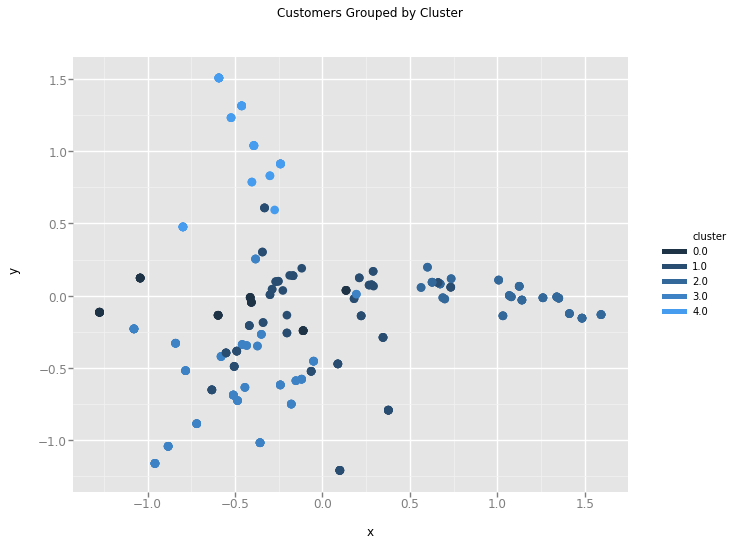

<ggplot: (174855226530)>

In [9]:
df = pd.merge(df_t, customer_clusters)
df = pd.merge(df_o, df)

from ggplot import *
ggplot(df, aes(x='x', y='y', color='cluster')) + \
    geom_point(size=75) + \
    ggtitle("Customers Grouped by Cluster")